In [2]:
mmwave_log <- read.csv("./driving1.csv")
log2 <- read.csv('./driving2.csv')
log3 <- read.csv('./driving3.csv')

In [3]:
library(ggplot2)
str(mmwave_log)
str(log2)
str(log3)

'data.frame':	3482 obs. of  9 variables:
 $ time.s         : num  418 418 418 418 418 ...
 $ rx_evm.dB      : int  -2 -2 -2 -3 -2 -3 -2 -2 -2 -2 ...
 $ rx_snr.dB      : int  -2 -2 -1 0 0 1 0 -1 -1 -2 ...
 $ rx_rssi.dB     : int  -74 -75 -74 -73 -73 -73 -73 -73 -73 -73 ...
 $ rx_rcpi.dB     : int  -77 -76 -76 -76 -76 -75 -76 -76 -76 -76 ...
 $ rx_per..       : num  6.34 6.36 6.37 6.38 6.38 6.38 6.38 6.39 6.39 6.39 ...
 $ agc_state      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ tx_bitrate.Mbps: int  0 0 0 0 0 0 0 0 0 0 ...
 $ rx_bitrate.Mbps: num  3.97 106.91 187.43 234.67 274.27 ...
'data.frame':	2877 obs. of  9 variables:
 $ time.s         : num  917 917 917 917 917 ...
 $ rx_evm.dB      : int  -8 -8 -8 -7 -7 -7 -7 -6 -7 -6 ...
 $ rx_snr.dB      : int  9 9 10 9 9 9 9 8 8 8 ...
 $ rx_rssi.dB     : int  -64 -65 -65 -65 -65 -66 -65 -66 -66 -66 ...
 $ rx_rcpi.dB     : int  -66 -66 -66 -66 -67 -67 -68 -67 -68 -68 ...
 $ rx_per..       : num  16.1 16.1 16.1 16.1 16.1 ...
 $ agc_state      : int  0 7

In [ ]:
ggplot(data = mmwave_log, aes(x = time.s - 362, y = rx_bitrate.Mbps)) +
  geom_point()

In [ ]:
rx <- mmwave_log$rx_bitrate
series <- ts(rx) 
snr <- mmwave_log$rx_snr.dB
snr_series <- ts(snr)
ggplot(data = mmwave_log, aes(x = time.s - 362, y = rx_snr.dB)) +
  geom_point()

In [ ]:
plot.ts(series)
series

In [ ]:
library(TTR)
seriesSMA8 <- SMA(series,n=8)
plot.ts(seriesSMA8)

In [ ]:
seriesSMA25 <- SMA(series,n=25)
plot.ts(seriesSMA25)

In [ ]:
snr_seriesSMA25 <- SMA(snr_series,n=25)
plot.ts(snr_seriesSMA25)

In [ ]:
ggplot(mmwave_log, aes(x=mmwave_log$rx_bitrate)) + geom_histogram(binwidth=10)
length(which(mmwave_log$rx_bitrate >= 200))

In [ ]:
ggplot(mmwave_log, aes(x=mmwave_log$rx_snr.dB)) + geom_histogram(binwidth=0.5)

In [90]:
#nonzero_log1 <- subset(mmwave_log, rx_bitrate.Mbps > 0)
#write.csv(nonzero_log1, './nonzero_log1.csv')
#nonzero_log2 <- subset(log2, rx_bitrate.Mbps > 0)
#write.csv(nonzero_log2, './nonzero_log2.csv')
#nonzero_log3 <- subset(log3, rx_bitrate.Mbps > 0)
#write.csv(nonzero_log3, './nonzero_log3.csv')

'data.frame':	2404 obs. of  10 variables:
 $ order          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time.s         : num  418 418 418 418 418 ...
 $ rx_evm.dB      : int  -2 -2 -2 -3 -2 -3 -2 -2 -2 -2 ...
 $ rx_snr.dB      : int  -2 -2 -1 0 0 1 0 -1 -1 -2 ...
 $ rx_rssi.dB     : int  -74 -75 -74 -73 -73 -73 -73 -73 -73 -73 ...
 $ rx_rcpi.dB     : int  -77 -76 -76 -76 -76 -75 -76 -76 -76 -76 ...
 $ rx_per..       : num  6.34 6.36 6.37 6.38 6.38 6.38 6.38 6.39 6.39 6.39 ...
 $ agc_state      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ tx_bitrate.Mbps: int  0 0 0 0 0 0 0 0 0 0 ...
 $ rx_bitrate.Mbps: num  3.97 106.91 187.43 234.67 274.27 ...


[1] 3

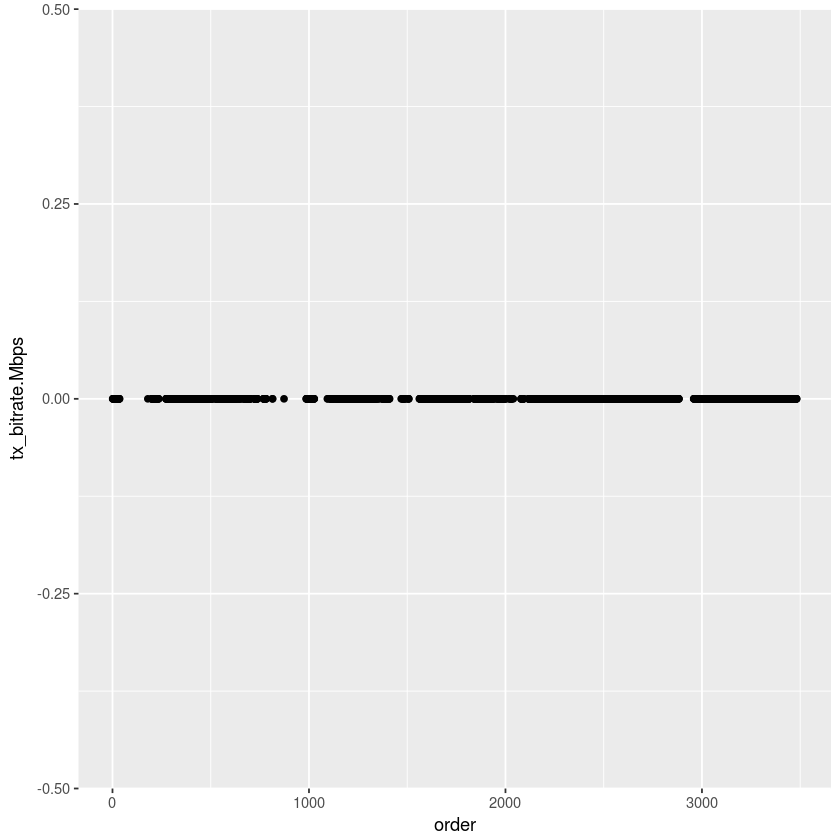

In [12]:
rx_log1 <- read.csv('./nonzero_log1.csv')
rx_log2 <- read.csv('./nonzero_log2.csv')
rx_log3 <- read.csv('./nonzero_log3.csv')
ggplot(data = rx_log1, aes(x = order, y = tx_bitrate.Mbps)) +
  geom_point()
str(rx_log1)
rx_log1[3,1]

In [19]:
diff <- 0
i <- 1
offset <- 0
k <- 1
lst <- list()
df <- data.frame(interval = numeric(300), point = numeric(300))
while (rx_log3[i,1] < length(rx_log3$order))
    {
    if( offset + i != rx_log3[i,1]) {
        diff <- rx_log3[i, 1] - rx_log3[i-1, 1]
        df$interval[k] <- diff
        df$point[k] <- offset + i
        offset <- rx_log3[i, 1] - i 
        k <- k + 1
    }
    i <- i + 1
}

str(df)
#write.csv(df, './interval_log1.csv')
#write.csv(df, './interval_log2.csv')
#write.csv(df, './interval_log3.csv')

'data.frame':	300 obs. of  2 variables:
 $ interval: num  37 6 4 102 4 4 6 5 11 2 ...
 $ point   : num  13 87 114 118 220 224 229 372 386 402 ...


In [28]:
log1 <- read.csv('./interval_log1.csv')
log2 <- read.csv('./interval_log2.csv')
log3 <- read.csv('./interval_log3.csv')
str(log1)
str(log2)
str(log3)
sum_log <- rbind(log1, log2, log3)
str(sum_log)

'data.frame':	94 obs. of  3 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ interval: int  144 19 3 3 36 5 3 5 3 3 ...
 $ point   : int  37 181 227 234 237 288 293 316 326 396 ...
'data.frame':	40 obs. of  3 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ interval: int  4 3 6 2 2 77 10 4 7 3 ...
 $ point   : int  57 144 150 158 160 235 573 597 763 782 ...
'data.frame':	127 obs. of  3 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ interval: int  37 6 4 102 4 4 6 5 11 2 ...
 $ point   : int  13 87 114 118 220 224 229 372 386 402 ...
'data.frame':	261 obs. of  3 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ interval: int  144 19 3 3 36 5 3 5 3 3 ...
 $ point   : int  37 181 227 234 237 288 293 316 326 396 ...


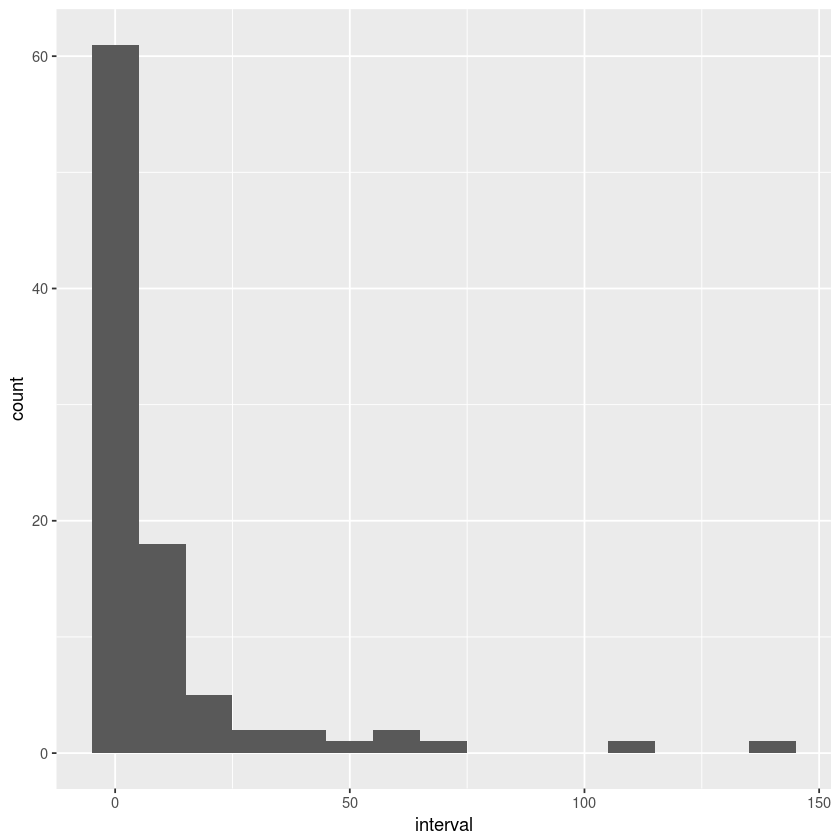

In [24]:
ggplot(log1, aes(x=interval)) + geom_histogram(binwidth=10)

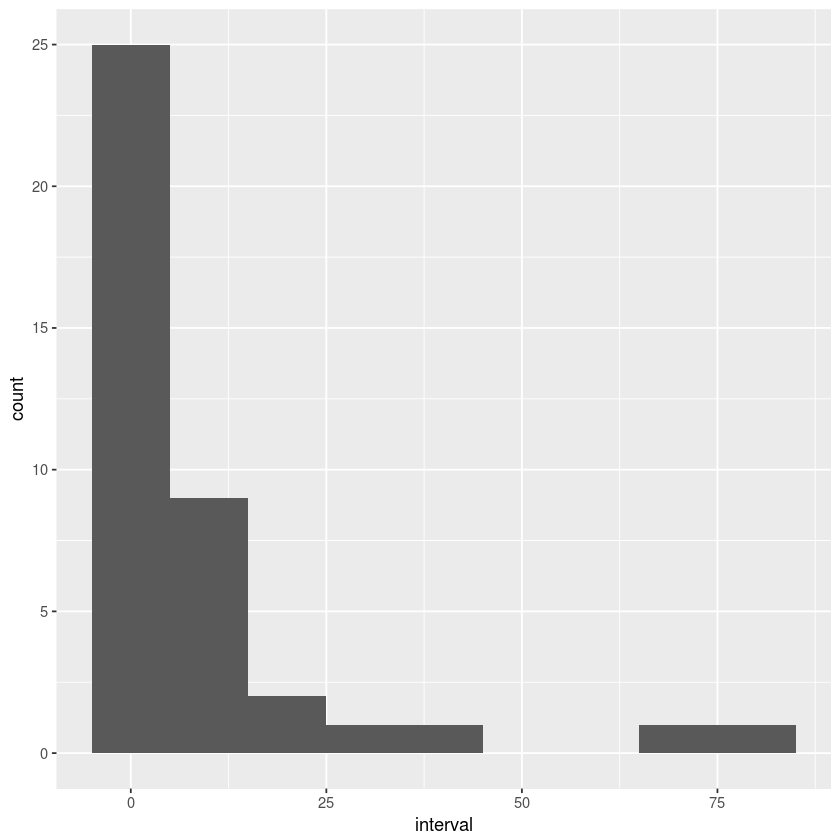

In [25]:
ggplot(log2, aes(x=interval)) + geom_histogram(binwidth=10)

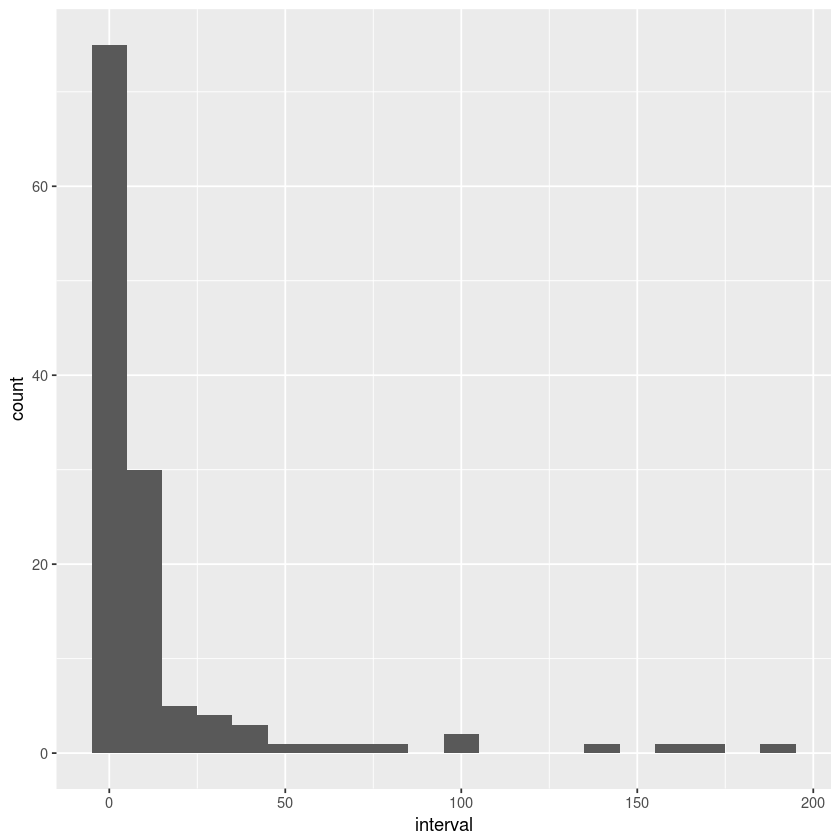

In [26]:
ggplot(log3, aes(x=interval)) + geom_histogram(binwidth=10)

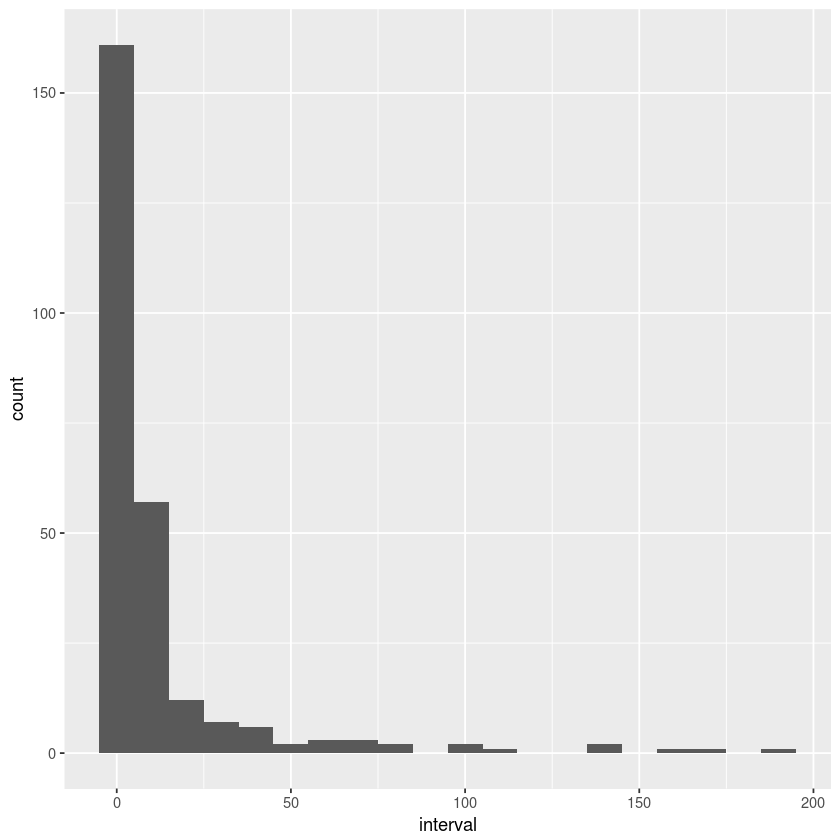

In [33]:
ggplot(sum_log, aes(x=interval)) + geom_histogram(binwidth=10)

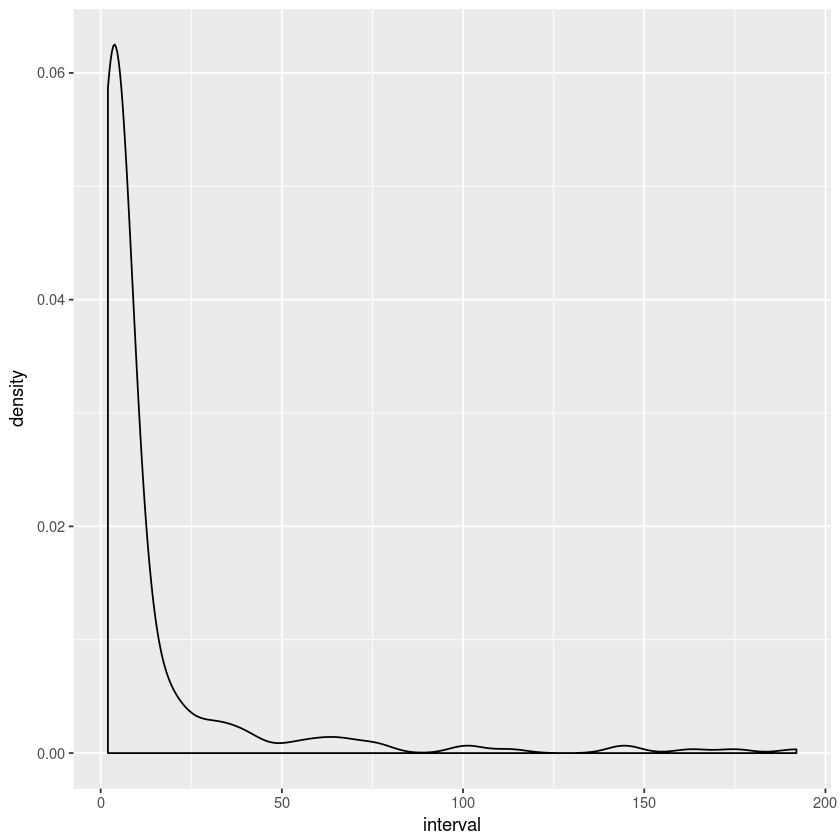

In [34]:
ggplot(sum_log, aes(interval)) +
  geom_density(adjust = 3)